In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
%load_ext tensorboard
import datetime

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [11]:
(x_train,y_train),(x_test, y_test) =keras.datasets.mnist.load_data()

In [12]:

y_train.shape

(60000,)

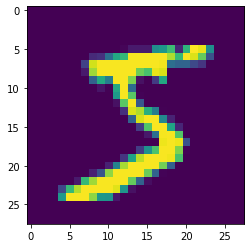

In [13]:
plt.imshow(x_train[0])
plt.show()

In [14]:
x_train = keras.utils.normalize(x_train, axis=1) # for normalization 
x_test = keras.utils.normalize(x_test, axis=1)


In [15]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [16]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [23]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")


In [18]:
#log_dir

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [25]:
model.fit(x_train, y_train,  validation_data = (x_test, y_test),callbacks=tensorboard_callback, epochs=3)

Epoch 1/3
   1/1875 [..............................] - ETA: 0s - loss: 0.0234 - accuracy: 1.0000WARNING:tensorflow:From C:\Users\Khan_Asad\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0550 - accuracy: 0.9824 - val_loss: 0.0930 - val_accuracy: 0.9701
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0412 - accuracy: 0.9866 - val_loss: 0.0913 - val_accuracy: 0.9718
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.0962 - val_accuracy: 0.9725


In [21]:
#%tensorboard --logdir logs/scalars

In [26]:
model.save("hand_written_recogination")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: hand_written_recogination\assets


In [27]:
import tensorflow as tf
new1=tf.keras.models.load_model("hand_written_recogination")

In [29]:
predication1 = new1.predict([x_test])

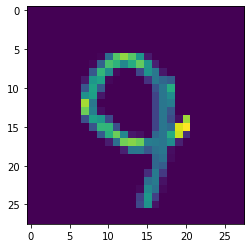

9


In [32]:
xy=999
plt.imshow(x_test[xy])
plt.show()
print(np.argmax(predication1[xy]))